# 필수과제1
1. 하이퍼 파라미터에 대한 사전적 정의를 정리하기 ( 항상 했던 방식대로 )
2. iris 데이터를 이용해 위의 하이퍼파라미터를 직접 변경해 값이 어떤 식으로 변하는지 확인
3. 정확도(f1스코어등 다양하게 가능)등 지표를 확인해서 어떤 식으로 바뀌는지 체크하기
4. gridseartchCV 등까지 해서 최적의 파라미터와 평가지표 값이 어떤 식으로 나오는지 체크
5. 본인이 판단하기에 어디까지가 과적합이 아닌지 정리하기

# DecisionTreeClassifier의 hyperparameter

## criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
- split의 quality를 결정하는 함수
- 디폴트는 gini

## splitter{“best”, “random”}, default=”best”
- The strategy used to choose the split at each node.

  - “best” to choose the best split
  - “random” to choose the best random split.

## max_depth(int), default=None
- The maximum depth of the tree.
- None일 경우 완벽히 클래스 결정값이 될 때까지 깊이를 계속 키우거나 노드가 커지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 분할

## min_samples_split(int or float), default=2
- 말단 노드가 되기 위한 최소한의 샘플 수
- 과적합을 제어하기 위한 용도, 비대칭적 데이터인 경우 특정 클래스 데이터가 극도로 작을 수 있으므로 작게 설정
  - int인 경우 :  min_samples_split을 최소 숫자로 지정
  - float인 경우 :  min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

## min_weight_fraction_leaf(float), default=0.0
- The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
- Samples have equal weight when sample_weight is not provided.

## max_features(int, float or {“auto”, “sqrt”, “log2”}), default=None
- 최적의 분할을 위해 고려할 최대 feature 개수
- 디폴트는 None, 데이터 세트의 모든 feature을 사용하여 분할

  - int : 대상 feature 개수
  - float : 전체 feature 중 대상 feature의 퍼센트
  - sqrt : 전체 feature 중 제곱근 값
  - log2 : 전체 feature를 log2로 설정

## max_leaf_nodes(int), default=None
- 말단 노드 최대 개수

## min_impurity_decrease(float), default=0.0
- 만약 이 분할이 min_impurity_decrease 이상의 불순물의 감소를 유도한다면 노드는 분할될 것이다.

- The weighted impurity decrease equation is the following:

  - N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)

  - N : 전체 샘플 수
  - N_t : 최근 노드의 샘플 수
  - N_t_L : 왼쪽 child의 표본 수
  - N_t_R : 오른쪽 child의 표본 수


## class_weight(dict, list of dict or “balanced”), default=None
- 이진 분류가 아닌 다중 분류의 경우 각 class별 가중치 부여 가능

## ccp_alpha(non-negative float), default=0.0
- 최소 비용-복잡도 가지치기에 사용되는 복잡도 매개변수
- ccp_alpha보다 작은 비용 복잡도가 가장 큰 하위 트리가 선택됨
- default는 가지치기는 수행되지 않음

# iris 데이터 이용한 hyperparameter에 따른 변화 확인

In [84]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [2]:
# iris 데이터 불러오기 및 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size = 0.3, random_state = 156)

## criterion
- criterion을 설정하면 시각화 결과 gini/entropy/log_loss 중 선택 가능
- 디폴트는 gini

In [8]:
# 모델 생성 및 학습
dt_clf = DecisionTreeClassifier(criterion = 'entropy')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

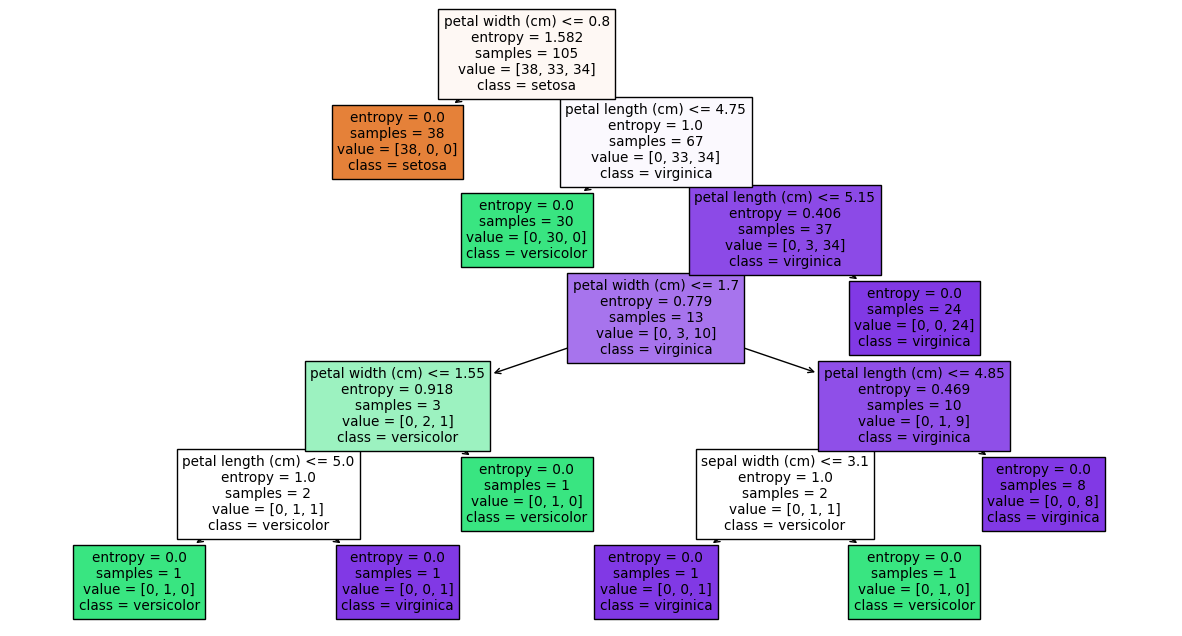

In [9]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## splitter
- 분할하는 전략, random/best 선택 가능

In [12]:
dt_clf = DecisionTreeClassifier(splitter = 'random')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')

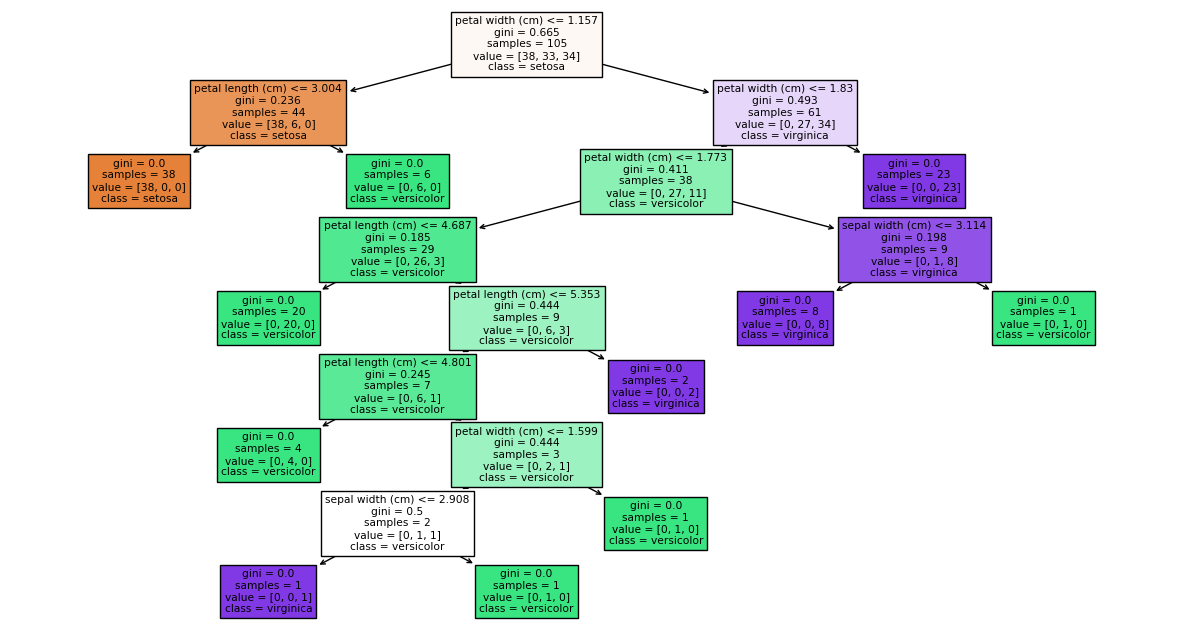

In [13]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## max_depth
- 최대 노드 깊이 설정
- 어떻게 설정하느냐에 따라 더 세분화하여 노드 설정 가능

In [22]:
dt_clf = DecisionTreeClassifier(max_depth = 9)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9)

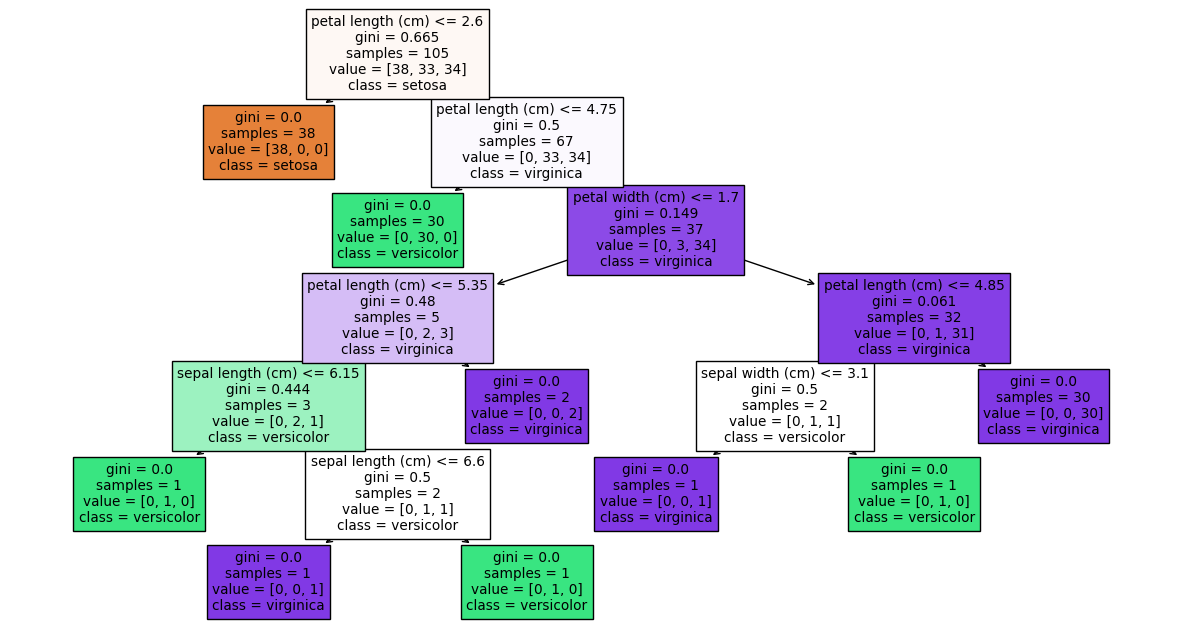

In [23]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## min_samples_split
- 각 분할 결과 나오는 샘플의 최소 수 설정
- 크게 설정할수록 분할이 잘 이루어지지 않음

In [28]:
dt_clf = DecisionTreeClassifier(min_samples_split = 99)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=99)

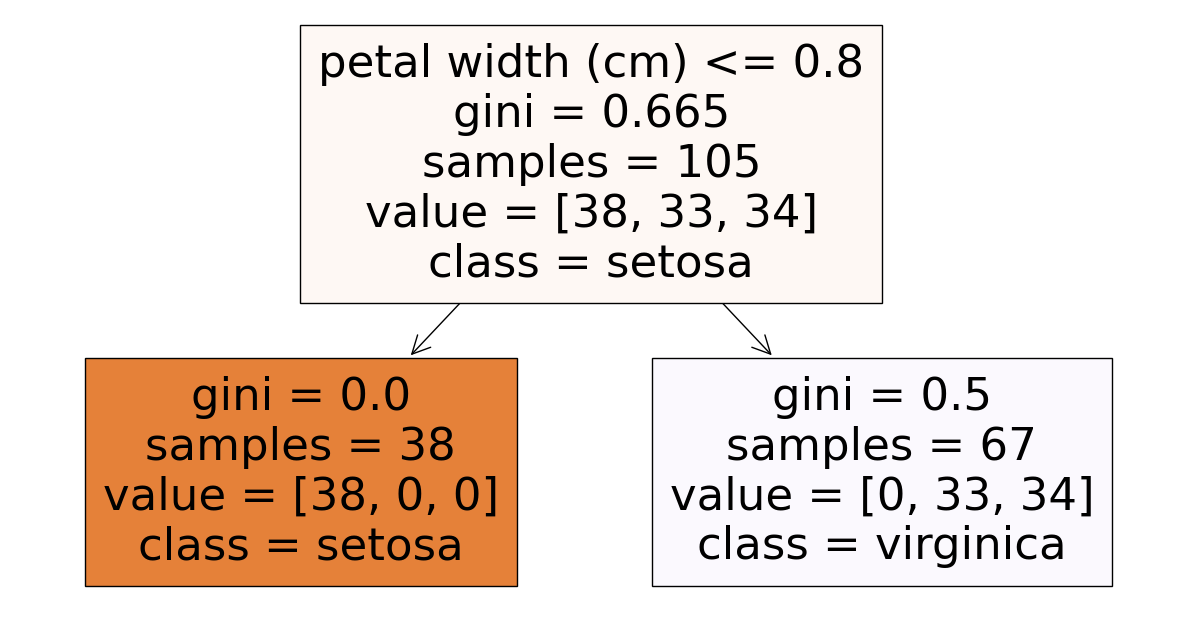

In [29]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## min_weight_fraction_leaf
- 값이 작을수록 분할이 잘 이루어짐

In [35]:
dt_clf = DecisionTreeClassifier(min_weight_fraction_leaf = 0.1)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_weight_fraction_leaf=0.1)

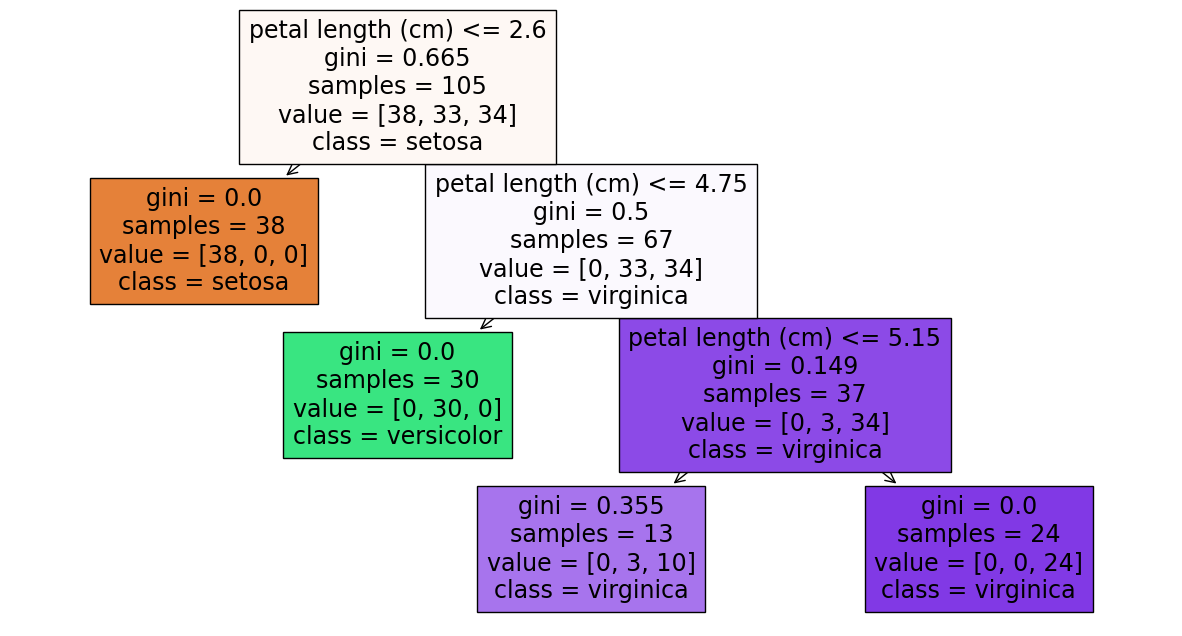

In [36]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## max_features

In [37]:
dt_clf = DecisionTreeClassifier(max_features = 'sqrt')
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_features='sqrt')

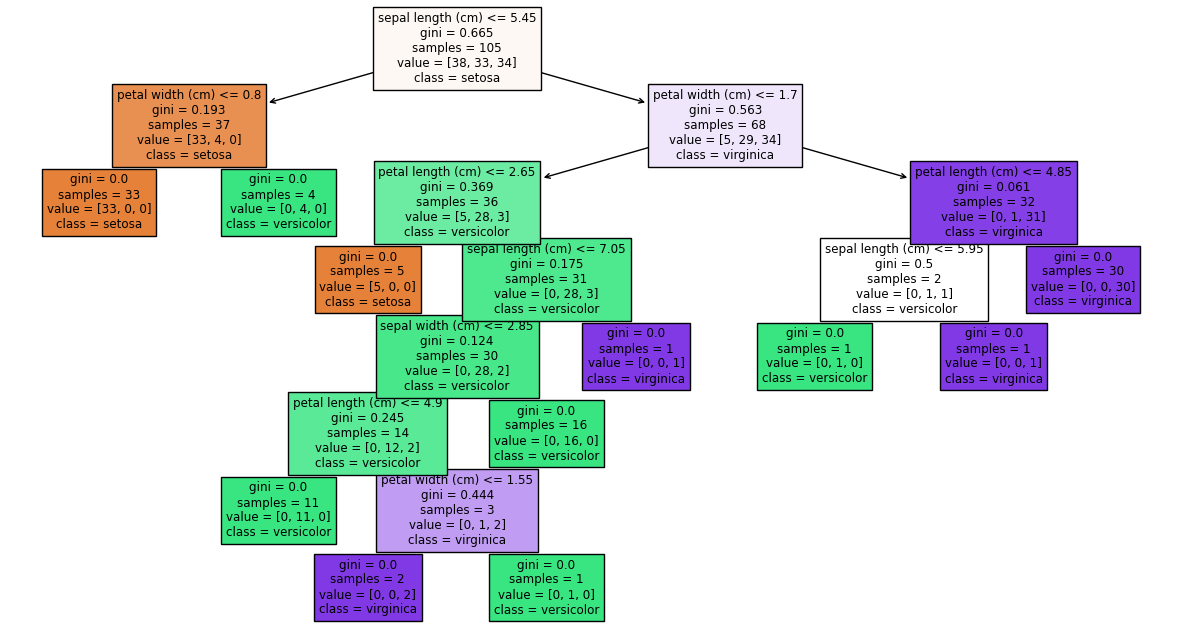

In [38]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## max_leaf_nodes

In [41]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes = 8)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=8)

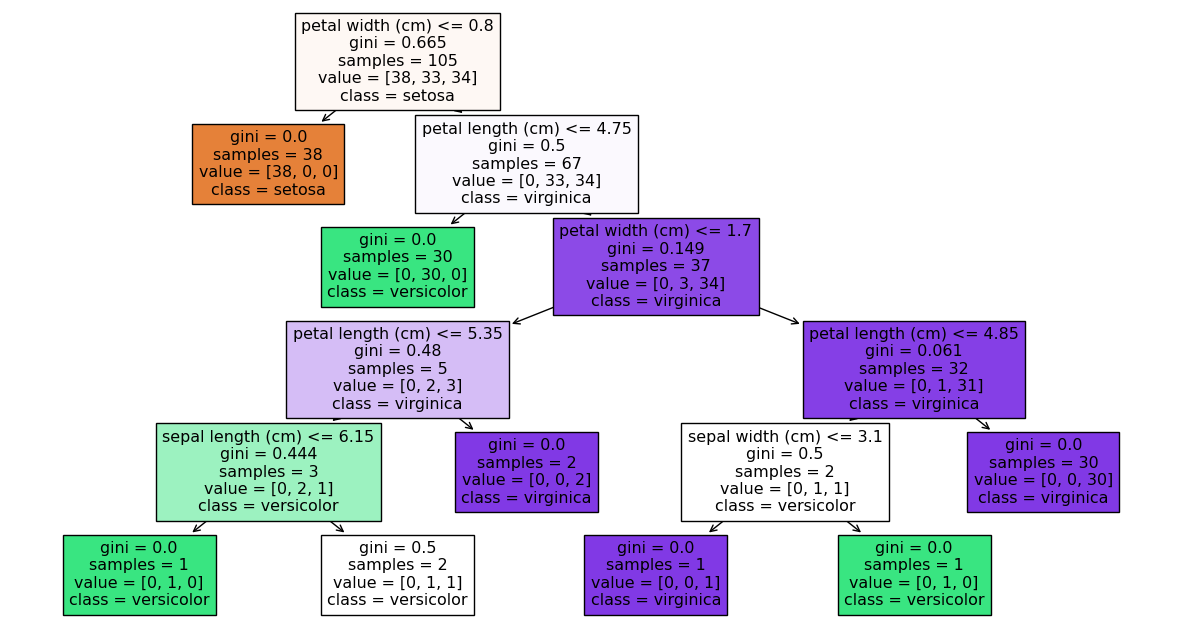

In [42]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## min_impurity_decrease

In [51]:
dt_clf = DecisionTreeClassifier(min_impurity_decrease = 0.005)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=0.005)

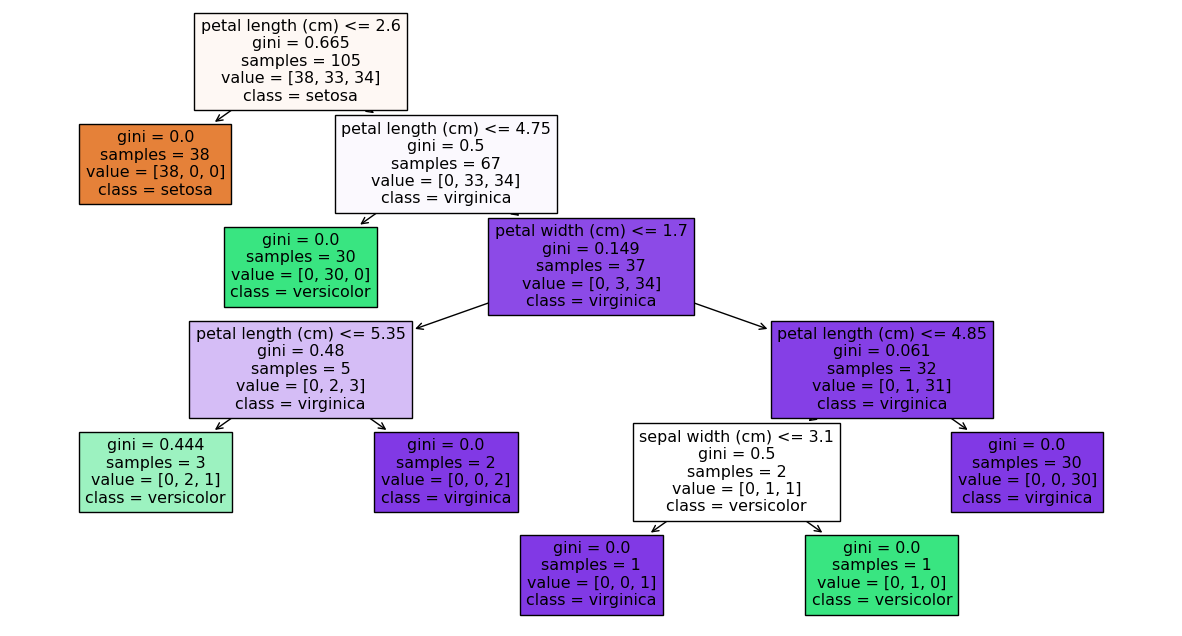

In [52]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## class_weight

In [56]:
dt_clf = DecisionTreeClassifier(class_weight = {0 : 0, 1 : 0.2, 2 : 0.5})
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0, 1: 0.2, 2: 0.5})

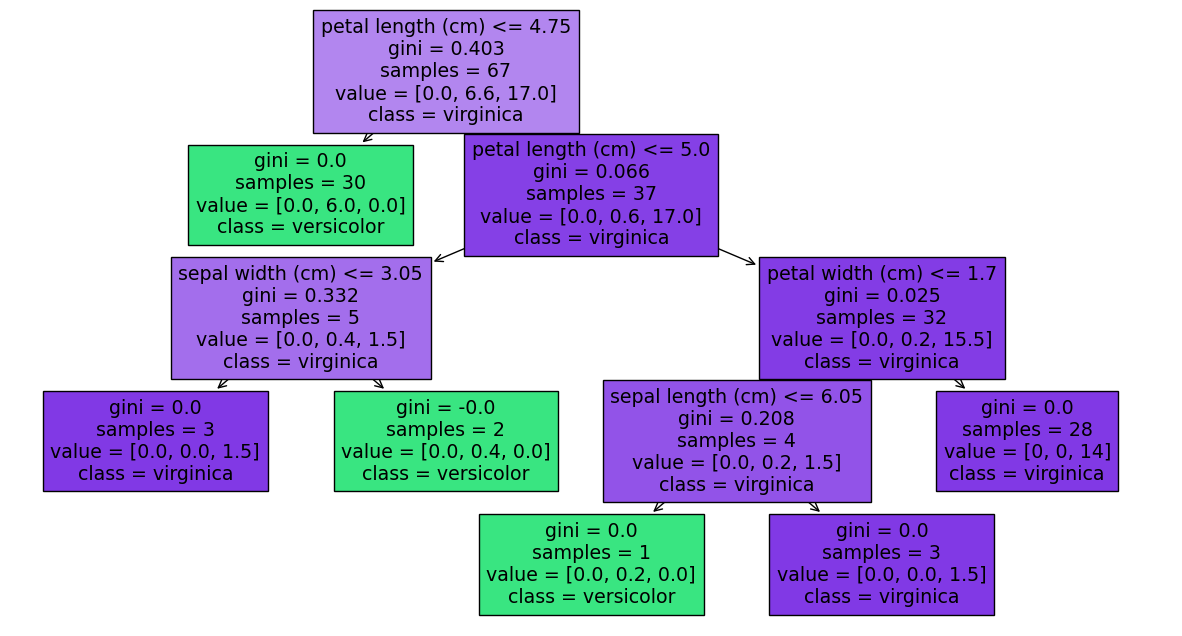

In [57]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

## ccp_alpha

In [64]:
dt_clf = DecisionTreeClassifier(ccp_alpha = 0.000001)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=1e-06)

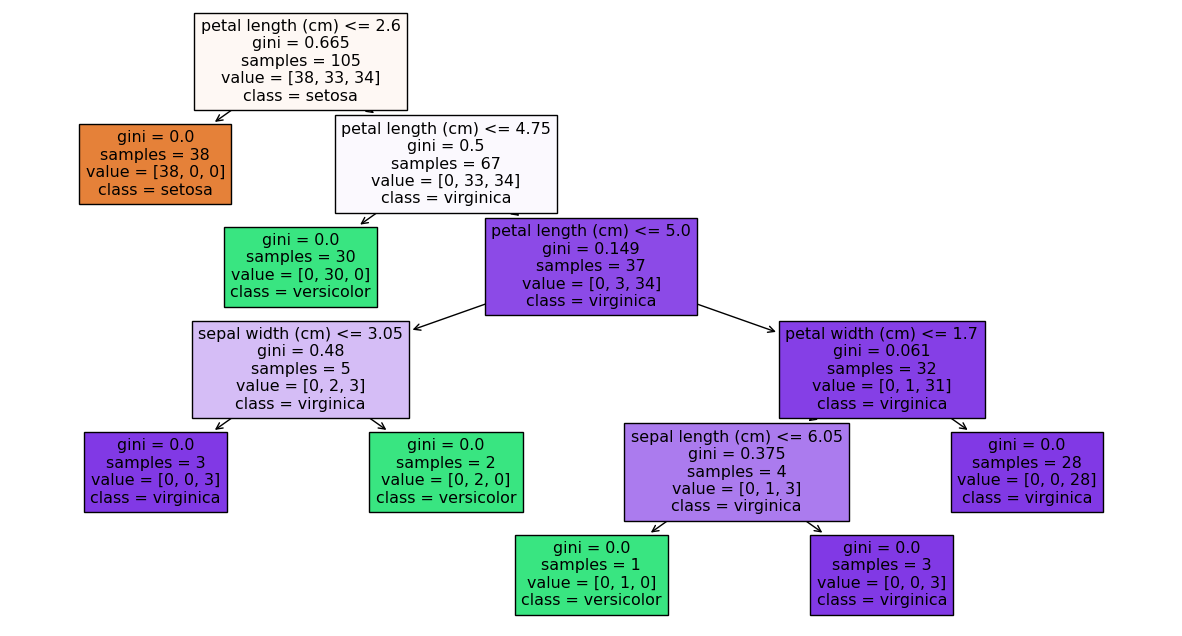

In [65]:
import graphviz
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

# 정확도 평가

In [68]:
from sklearn.metrics import accuracy_score

# 파라미터 없음
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)

pred = dt_clf.predict(X_test)
accuracy= accuracy_score(y_test, pred)

print('하이퍼파라미터 추가 전 기본 베이스 ', accuracy)
print(dt_clf.get_params())

하이퍼파라미터 추가 전 기본 베이스  0.9111111111111111
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [70]:
# 파라미터 변경1
dt_clf_2= DecisionTreeClassifier(max_depth = 4, min_samples_split=7, random_state=156)
dt_clf_2.fit(X_train, y_train)

pred = dt_clf_2.predict(X_test)
accuracy= accuracy_score(y_test, pred)

print('하이퍼파라미터 추가 후 ', accuracy)
print(dt_clf_2.get_params())

하이퍼파라미터 추가 후  0.8888888888888888
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [77]:
# 파라미터 변경2
dt_clf_3= DecisionTreeClassifier(max_depth = 2, min_samples_split=4, splitter = 'random', max_features = 2, max_leaf_nodes = 8, random_state=156)
dt_clf_3.fit(X_train, y_train)

pred = dt_clf_3.predict(X_test)
accuracy= accuracy_score(y_test, pred)

print('하이퍼파라미터 추가 후 ', accuracy)
print(dt_clf_3.get_params())

하이퍼파라미터 추가 후  0.9555555555555556
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': 2, 'max_leaf_nodes': 8, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'random'}


# GridSearchCV

In [82]:
from sklearn.model_selection import GridSearchCV
# hyperparameter
hyperparams = {
    'max_depth': [2, 3,4,5,6],
    'min_samples_split': [2, 3,4,5,6],
    'splitter' : ['best', 'random'],
    'min_weight_fraction_leaf' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : [4,5,6,7,8,9],
    'max_leaf_nodes' : [4,5,6,7,8,9],
    'min_impurity_decrease' : [0.001,0.00001,0.1,1,0.0000001],
    'ccp_alpha' : [0.2,0.002,0.0002,0.000002,0.02]
}

# gridsearchcv
dtc = DecisionTreeClassifier()
grid_tree = GridSearchCV(dtc, param_grid=hyperparams, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.2, 0.002, 0.0002, 2e-06, 0.02],
                         'max_depth': [2, 3, 4, 5, 6],
                         'max_features': [4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.001, 1e-05, 0.1, 1, 1e-07],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'splitter': ['best', 'random']})

In [83]:
print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
print(grid_tree.best_estimator_)

# 정확도
em = grid_tree.best_estimator_
pred = em.predict(X_test)
print(accuracy_score(y_test, pred))

best parameters :  {'ccp_alpha': 0.02, 'max_depth': 5, 'max_features': 4, 'max_leaf_nodes': 6, 'min_impurity_decrease': 1e-07, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.1, 'splitter': 'random'}
best score :  1.0
DecisionTreeClassifier(ccp_alpha=0.02, max_depth=5, max_features=4,
                       max_leaf_nodes=6, min_impurity_decrease=1e-07,
                       min_weight_fraction_leaf=0.1, splitter='random')
0.9555555555555556


In [93]:
dt_clf = DecisionTreeClassifier(ccp_alpha = 0.02, max_depth = 5, max_features = 4,
                                max_leaf_nodes = 6, min_impurity_decrease = 1e-07,
                                min_samples_split = 2, min_weight_fraction_leaf = 0.1,
                                splitter = 'random').fit(X_train, y_train)

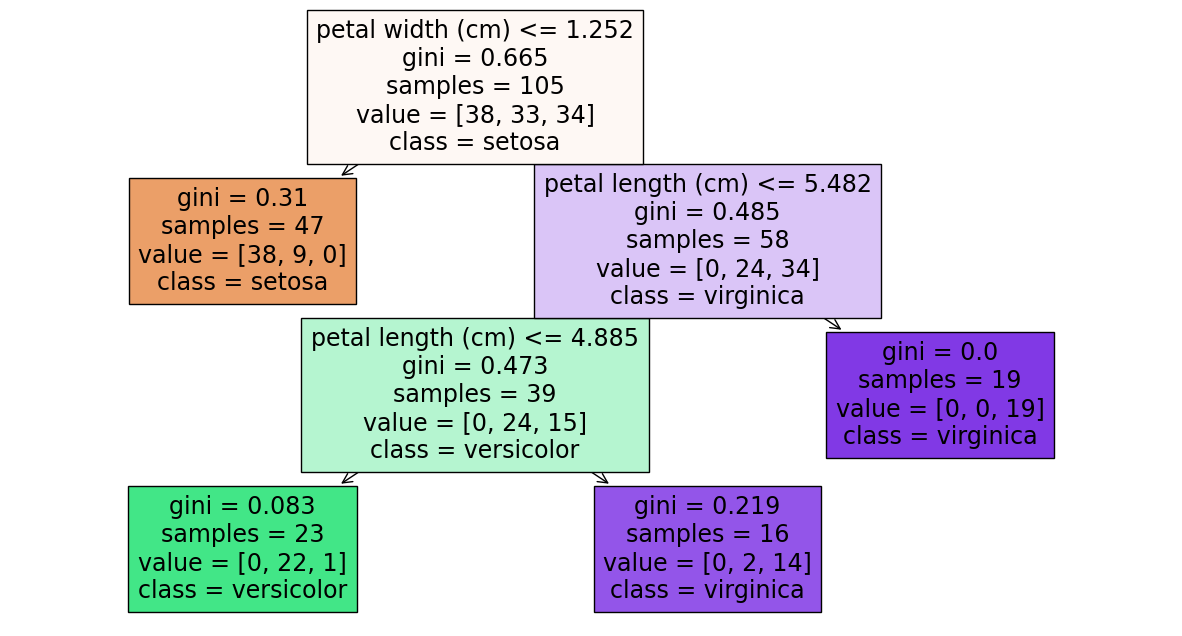

In [94]:
fig = plt.figure(figsize=(15,8))
_= tree.plot_tree(dt_clf,
                 feature_names = iris_data.feature_names,
                 class_names=iris_data.target_names,
                 filled=True)

- 제대로 잘 나눠지진 않았지만 어느 정도 분리가 잘 된것으로 보아 과적합이 일어나지 않았다고 생각한다

In [97]:
print('accruacy :',accuracy_score(y_test, pred))

accruacy : 0.9555555555555556
